<a href="https://colab.research.google.com/github/nnaemekaukpa/Leveraging-Deep-Learning-Architecture-for-Accurate-and-Efficient-Bone-Cancer-Detection-/blob/main/AlexNet_%2B_Canny_Edge__(split701515_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing the necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image as mpimg
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/train'
valid_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/valid'
test_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/test'

In [ ]:
import os
import shutil
import random

train_dir = os.path.join(train_dataset, "")
val_dir = os.path.join(valid_dataset, "")
test_dir = os.path.join(test_dataset, "")
categories = ["normal", "cancer"]
target_val_size = 2643
target_test_size = 2643

## Validation dataset splitting
current_total_val = sum(len(os.listdir(os.path.join(val_dir, cat))) for cat in categories)
images_needed_val = max(0, target_val_size - current_total_val)

if images_needed_val == 0:
    print("Validation dataset is now splitted")
else:
    moved_count_val = 0
    for category in categories:
        train_path = os.path.join(train_dir, category)
        val_path = os.path.join(val_dir, category)
        train_images = os.listdir(train_path)
        images_to_move_val = min(images_needed_val // 2, len(train_images))

        for image in random.sample(train_images, images_to_move_val):
            shutil.move(os.path.join(train_path, image), os.path.join(val_path, image))
            moved_count_val += 1
            print(f"Moved {images_to_move_val} images to '{val_path}'")
print("Validation image movement is now complete")

## Testing dataset splitting
current_total_test = sum(len(os.listdir(os.path.join(test_dir, cat))) for cat in categories)
images_needed_test = max(0, target_test_size - current_total_test)

if images_needed_test == 0:
    print("Testing dataset is now splitted")
else:
    moved_count_test = 0
    for category in categories:
        train_path = os.path.join(train_dir, category)
        test_path = os.path.join(test_dir, category)
        train_images = os.listdir(train_path)
        images_to_move_test = min(images_needed_test // 2, len(train_images))

        for image in random.sample(train_images, images_to_move_test):
            shutil.move(os.path.join(train_path, image), os.path.join(test_path, image))
            moved_count_test += 1
            print(f"Moved {images_to_move_test} images to '{test_path}'")
print("Testing image movement is now complete")


Validation dataset is now splitted
Validation image movement is now complete
Testing dataset is now splitted
Testing image movement is now complete


In [ ]:
## function to list files and folder in the directory
def list_contents(directory):
  if os.path.exists(directory):
    print(f'contents of {directory}:')
    print(os.listdir(directory))
  else:
    print(f'{directory} does not exist')



In [ ]:
list_contents(train_dataset)
list_contents(valid_dataset)
list_contents(test_dataset)

contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/train:
['normal', 'cancer']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/valid:
['cancer', 'normal']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/test:
['normal', 'cancer']


In [ ]:
def count_files(directory):
  if os.path.exists(directory):
    classes=[i for i in os.listdir(directory) if os.path.isdir(os.path.join(directory, i))]
    total_files=sum([len(files) for _,_,files in os.walk(directory)])
    print(f'found {total_files} images belonging to {len(classes)} classes.')
  else:
    print(f'{directory} does not exist')

In [ ]:
count_files(train_dataset)
count_files(valid_dataset)
count_files(test_dataset)

found 17617 images belonging to 2 classes.
found 2643 images belonging to 2 classes.
found 2643 images belonging to 2 classes.


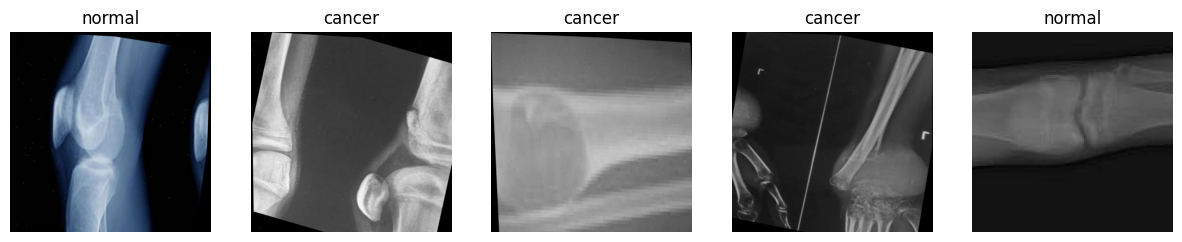

In [ ]:


# Get classes (subfolders)
classes = [i for i in os.listdir(train_dataset) if os.path.isdir(os.path.join(train_dataset, i))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(train_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1,5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")
plt.show()


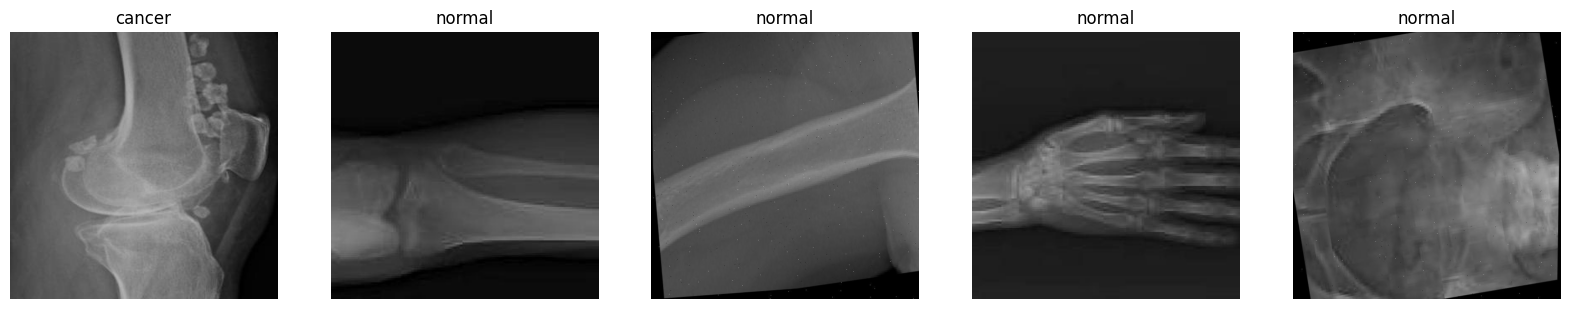

In [ ]:


# Get classes (subfolders)
classes = [d for d in os.listdir(test_dataset) if os.path.isdir(os.path.join(test_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(test_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


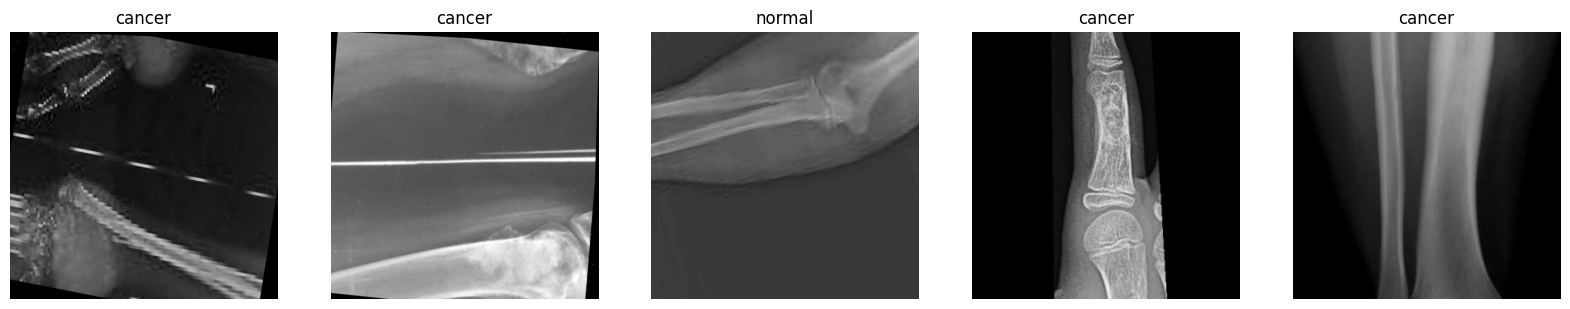

In [ ]:


# Get classes (subfolders)
classes = [d for d in os.listdir(valid_dataset) if os.path.isdir(os.path.join(valid_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(valid_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


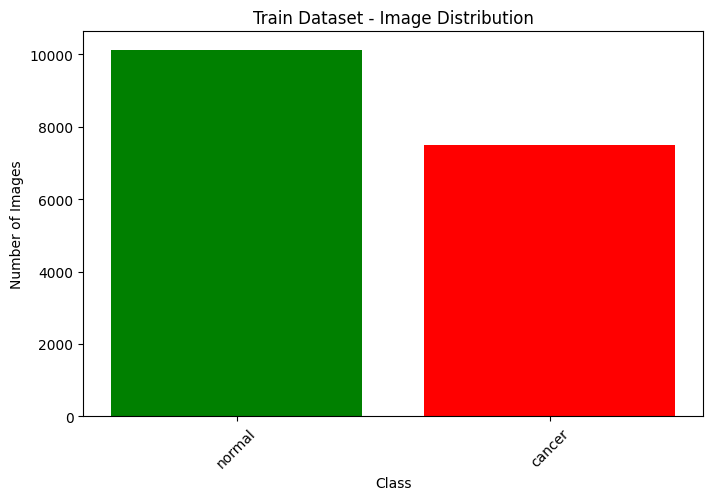

In [ ]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(train_dataset):
    class_path = os.path.join(train_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Train Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



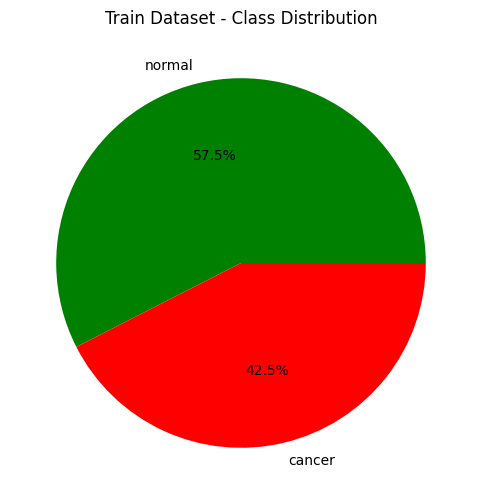

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title("Train Dataset - Class Distribution")
plt.show()

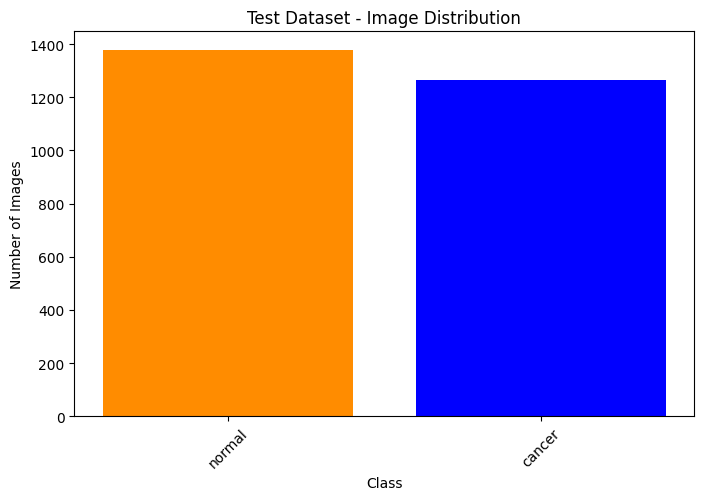

In [ ]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(test_dataset):
    class_path = os.path.join(test_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.values()
plt.bar(class_counts.keys(), class_counts.values(), color=['darkorange','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Test Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



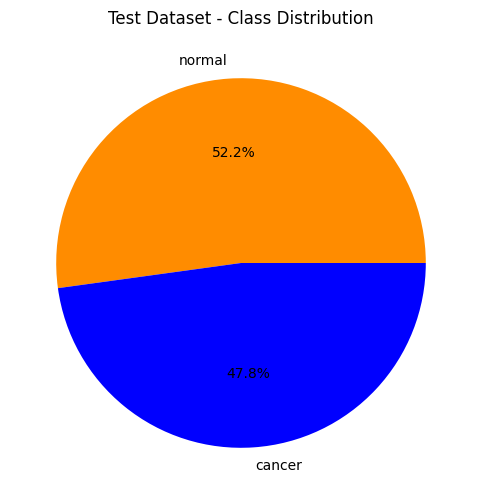

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['darkorange', 'blue'])
plt.title("Test Dataset - Class Distribution")
plt.show()

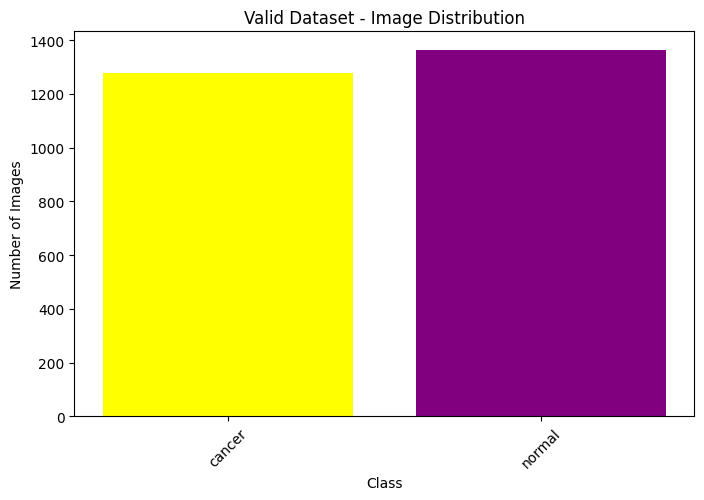

In [ ]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(valid_dataset):
    class_path = os.path.join(valid_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=[ 'yellow', 'purple'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Valid Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



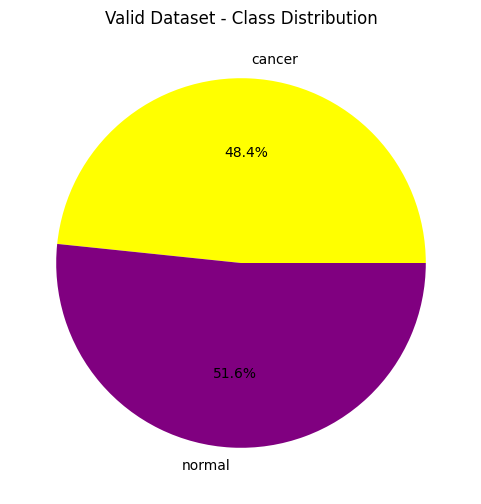

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['yellow', 'purple'])
plt.title("Valid Dataset - Class Distribution")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
def preprocess_image(image_path):
    """
    Function to read an image, resize it, and apply Canny edge detection.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (227, 227))
    edges = cv2.Canny(img, 100, 200)
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    return edges

In [ ]:
def preprocess_and_load(image_path):
    """
    Load image and apply preprocessing using Canny edge detection.
    """
    img = preprocess_image(image_path)
    return img

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image
)

In [ ]:
def create_dataframe(dataset_path):
    data = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                data.append([os.path.join(class_name, image_file), class_name])  # [image, label]
    return pd.DataFrame(data, columns=['image', 'label'])

train_df = create_dataframe(train_dataset)
test_df = create_dataframe(test_dataset)
valid_df = create_dataframe(valid_dataset)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image and batch sizes
image_size = (227, 227)
batch_size = 32

# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation and test data
test_val_datagen = ImageDataGenerator(rescale=1./255)

#  Training generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    directory=train_dataset
)

#  Validation generator
valid_generator = test_val_datagen.flow_from_dataframe(
    valid_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=valid_dataset
)

#  Test generator
test_generator = test_val_datagen.flow_from_dataframe(
    test_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=test_dataset
)


Found 17617 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.


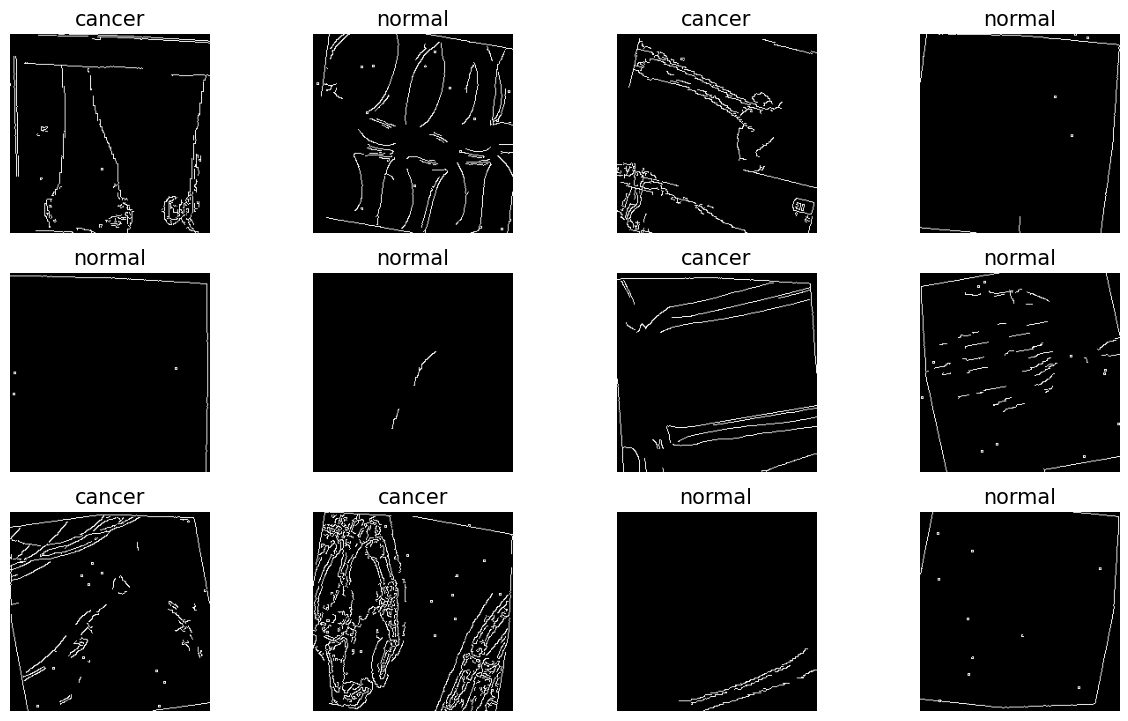

In [ ]:
plt.figure(figsize=(15, 15))
for n, i in enumerate(np.random.randint(0, len(train_df), 12)):
    plt.subplot(5, 4, n + 1)
    # Get the full image path by joining it with the train_dataset directory
    image_path = os.path.join(train_dataset, train_df.image[i])
    img = preprocess_image(image_path)

    # Add a check to see if the image was loaded correctly
    if img is not None:
        plt.imshow(img)
        plt.axis('off')
        plt.title(train_df.label[i], fontsize=15)
    else:
        print(f"Failed to load image: {image_path}")

plt.show()

In [ ]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

# Binary classification - final output = 1 with sigmoid activation
class_num = 1

model = models.Sequential()

# Layer 1: Conv  ReLU  MaxPool
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4),
                        activation='relu', input_shape=(227, 227, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2: Conv  ReLU MaxPool
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same',
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3: Conv  ReLU
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                        activation='relu'))

# Layer 4: Conv ReLU
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                        activation='relu'))

# Layer 5: Conv ReLU  MaxPool
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten before fully connected layers
model.add(layers.Flatten())

# FC1: Dense + Dropout
model.add(layers.Dense(4096, activation='relu',
                       kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))

# FC2: Dense + Dropout
model.add(layers.Dense(4096, activation='relu',
                       kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))

# Output Layer (1 neuron, sigmoid for binary classification)
model.add(layers.Dense(class_num, activation='sigmoid'))

# Compile
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 55, 55, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,286,849 (222.35 MB)

 Trainable params: 58,286,145 (222.34 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam # Importing the Adam optimizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics
import  tensorflow.keras as keras


In [ ]:
checkpoint_cb =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5),keras.metrics.AUC()])
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7055 - auc: 0.7700 - loss: 4.7741 - specificity_at_sensitivity: 0.8755

551/551 ━━━━━━━━━━━━━━━━━━━━ 5779s 10s/step - accuracy: 0.7056 - auc: 0.7701 - loss: 4.7698 - specificity_at_sensitivity: 0.8756 - val_accuracy: 0.8070 - val_auc: 0.9062 - val_loss: 1.1396 - val_specificity_at_sensitivity: 0.9781
Epoch 2/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.7985 - auc: 0.8808 - loss: 1.0374 - specificity_at_sensitivity: 0.9617

551/551 ━━━━━━━━━━━━━━━━━━━━ 303s 550ms/step - accuracy: 0.7985 - auc: 0.8808 - loss: 1.0373 - specificity_at_sensitivity: 0.9617 - val_accuracy: 0.7764 - val_auc: 0.9045 - val_loss: 0.7902 - val_specificity_at_sensitivity: 0.9844
Epoch 3/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 298s 541ms/step - accuracy: 0.8036 - auc: 0.8906 - loss: 0.6984 - specificity_at_sensitivity: 0.9689 - val_accuracy: 0.6455 - val_auc: 0.8784 - val_loss: 0.9197 - val_specificity_at_sensitivity: 0.9554
Epoch 4/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.8082 - auc: 0.8978 - loss: 0.5335 - specificity_at_sensitivity: 0.9707

551/551 ━━━━━━━━━━━━━━━━━━━━ 323s 543ms/step - accuracy: 0.8082 - auc: 0.8978 - loss: 0.5335 - specificity_at_sensitivity: 0.9707 - val_accuracy: 0.6988 - val_auc: 0.9043 - val_loss: 0.6396 - val_specificity_at_sensitivity: 0.9804
Epoch 5/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.8219 - auc: 0.9052 - loss: 0.4589 - specificity_at_sensitivity: 0.9727

551/551 ━━━━━━━━━━━━━━━━━━━━ 313s 568ms/step - accuracy: 0.8219 - auc: 0.9052 - loss: 0.4588 - specificity_at_sensitivity: 0.9727 - val_accuracy: 0.7257 - val_auc: 0.9153 - val_loss: 0.5560 - val_specificity_at_sensitivity: 0.9851
Epoch 6/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.8132 - auc: 0.9007 - loss: 0.4404 - specificity_at_sensitivity: 0.9707

551/551 ━━━━━━━━━━━━━━━━━━━━ 304s 552ms/step - accuracy: 0.8132 - auc: 0.9007 - loss: 0.4404 - specificity_at_sensitivity: 0.9707 - val_accuracy: 0.8313 - val_auc: 0.9238 - val_loss: 0.4191 - val_specificity_at_sensitivity: 0.9851
Epoch 7/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 303s 549ms/step - accuracy: 0.8153 - auc: 0.9025 - loss: 0.4312 - specificity_at_sensitivity: 0.9713 - val_accuracy: 0.7836 - val_auc: 0.9263 - val_loss: 0.4295 - val_specificity_at_sensitivity: 0.9875
Epoch 8/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 294s 534ms/step - accuracy: 0.8109 - auc: 0.9004 - loss: 0.4233 - specificity_at_sensitivity: 0.9699 - val_accuracy: 0.7858 - val_auc: 0.9269 - val_loss: 0.4383 - val_specificity_at_sensitivity: 0.9883
Epoch 9/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.8136 - auc: 0.9061 - loss: 0.4122 - specificity_at_sensitivity: 0.9738

551/551 ━━━━━━━━━━━━━━━━━━━━ 302s 549ms/step - accuracy: 0.8136 - auc: 0.9061 - loss: 0.4122 - specificity_at_sensitivity: 0.9738 - val_accuracy: 0.8426 - val_auc: 0.9301 - val_loss: 0.3895 - val_specificity_at_sensitivity: 0.9851
Epoch 10/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 298s 540ms/step - accuracy: 0.8227 - auc: 0.9094 - loss: 0.4082 - specificity_at_sensitivity: 0.9730 - val_accuracy: 0.8316 - val_auc: 0.9223 - val_loss: 0.3896 - val_specificity_at_sensitivity: 0.9867


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,accuracy,auc,loss,specificity_at_sensitivity,val_accuracy,val_auc,val_loss,val_specificity_at_sensitivity
0,0.750809,0.831053,2.387047,0.935889,0.807037,0.906239,1.139634,0.978091
1,0.790486,0.873827,0.946394,0.957259,0.776390,0.904486,0.790241,0.984351
2,0.804677,0.893227,0.644800,0.968345,0.645479,0.878416,0.919721,0.955399
3,0.808367,0.896441,0.516814,0.968479,0.698827,0.904295,0.639570,0.980438
4,0.819095,0.903204,0.456201,0.970749,0.725690,0.915318,0.556006,0.985133
5,0.815122,0.902582,0.432668,0.972219,0.831252,0.923842,0.419083,0.985133
6,0.815803,0.904518,0.421703,0.973153,0.783579,0.926338,0.429530,0.987480
7,0.814497,0.904288,0.415153,0.969681,0.785849,0.926861,0.438310,0.988263
8,0.814724,0.905919,0.409659,0.974489,0.842603,0.930124,0.389468,0.985133
9,0.824090,0.909281,0.410721,0.973821,0.831631,0.922308,0.389598,0.986698


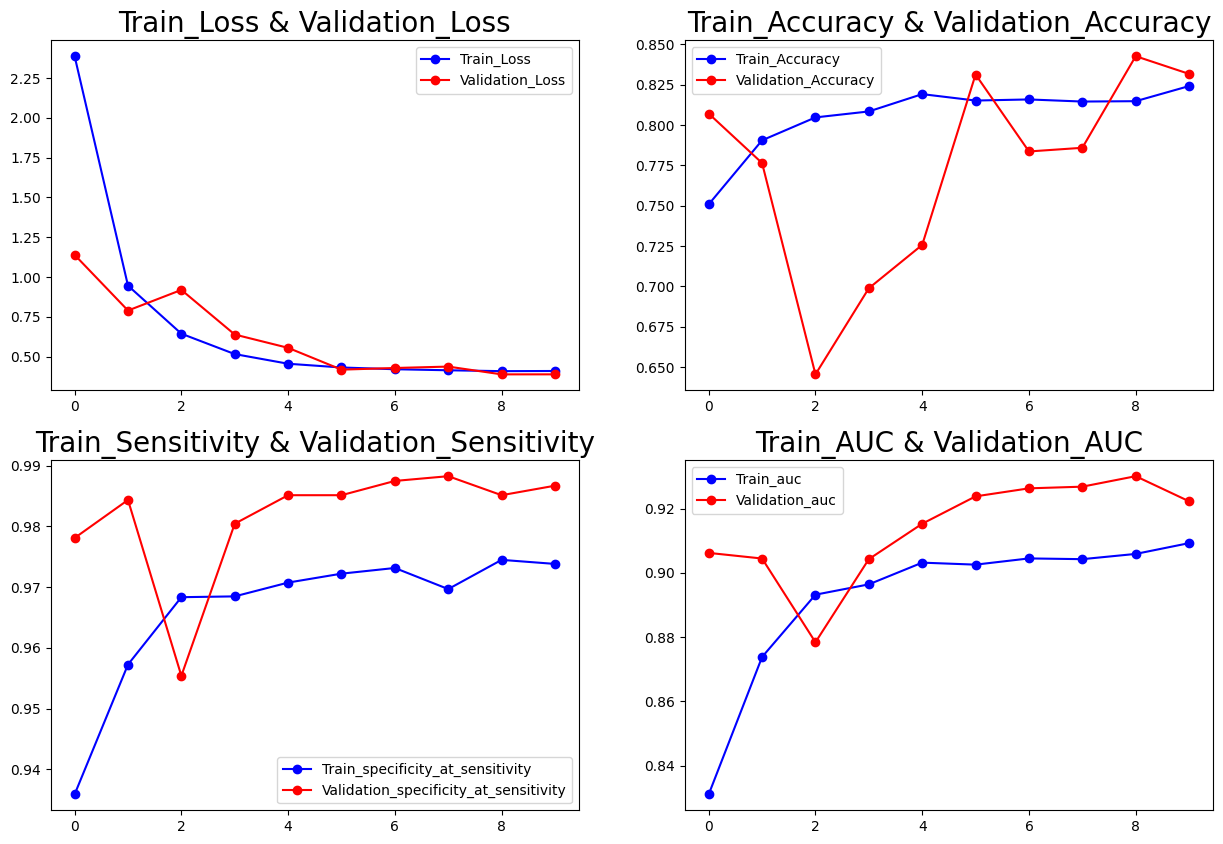

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(hist_['specificity_at_sensitivity'],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(hist_['val_specificity_at_sensitivity'],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(hist_['auc'],'b-o',label='Train_auc')
plt.plot(hist_['val_auc'],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [ ]:

# Get all the metrics (loss, accuracy, specificity_at_sensitivity, auc)
metrics = model.evaluate(test_generator, verbose=0)

# Assign values to variables
loss = metrics[0]
accuracy = metrics[1]
specificity_at_sensitivity = metrics[2]
auc = metrics[3]

# Print the metrics
print('Test Loss =', loss)
print('Test Accuracy =', accuracy)
print('Test Specificity at Sensitivity =', specificity_at_sensitivity)
print('Test AUC =', auc)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss = 0.3834139108657837
Test Accuracy = 0.8429814577102661
Test Specificity at Sensitivity = 0.9818037748336792
Test AUC = 0.9316353797912598


In [ ]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step


,Actual,Prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2638,0,0
2639,0,1
2640,0,1
2641,0,1


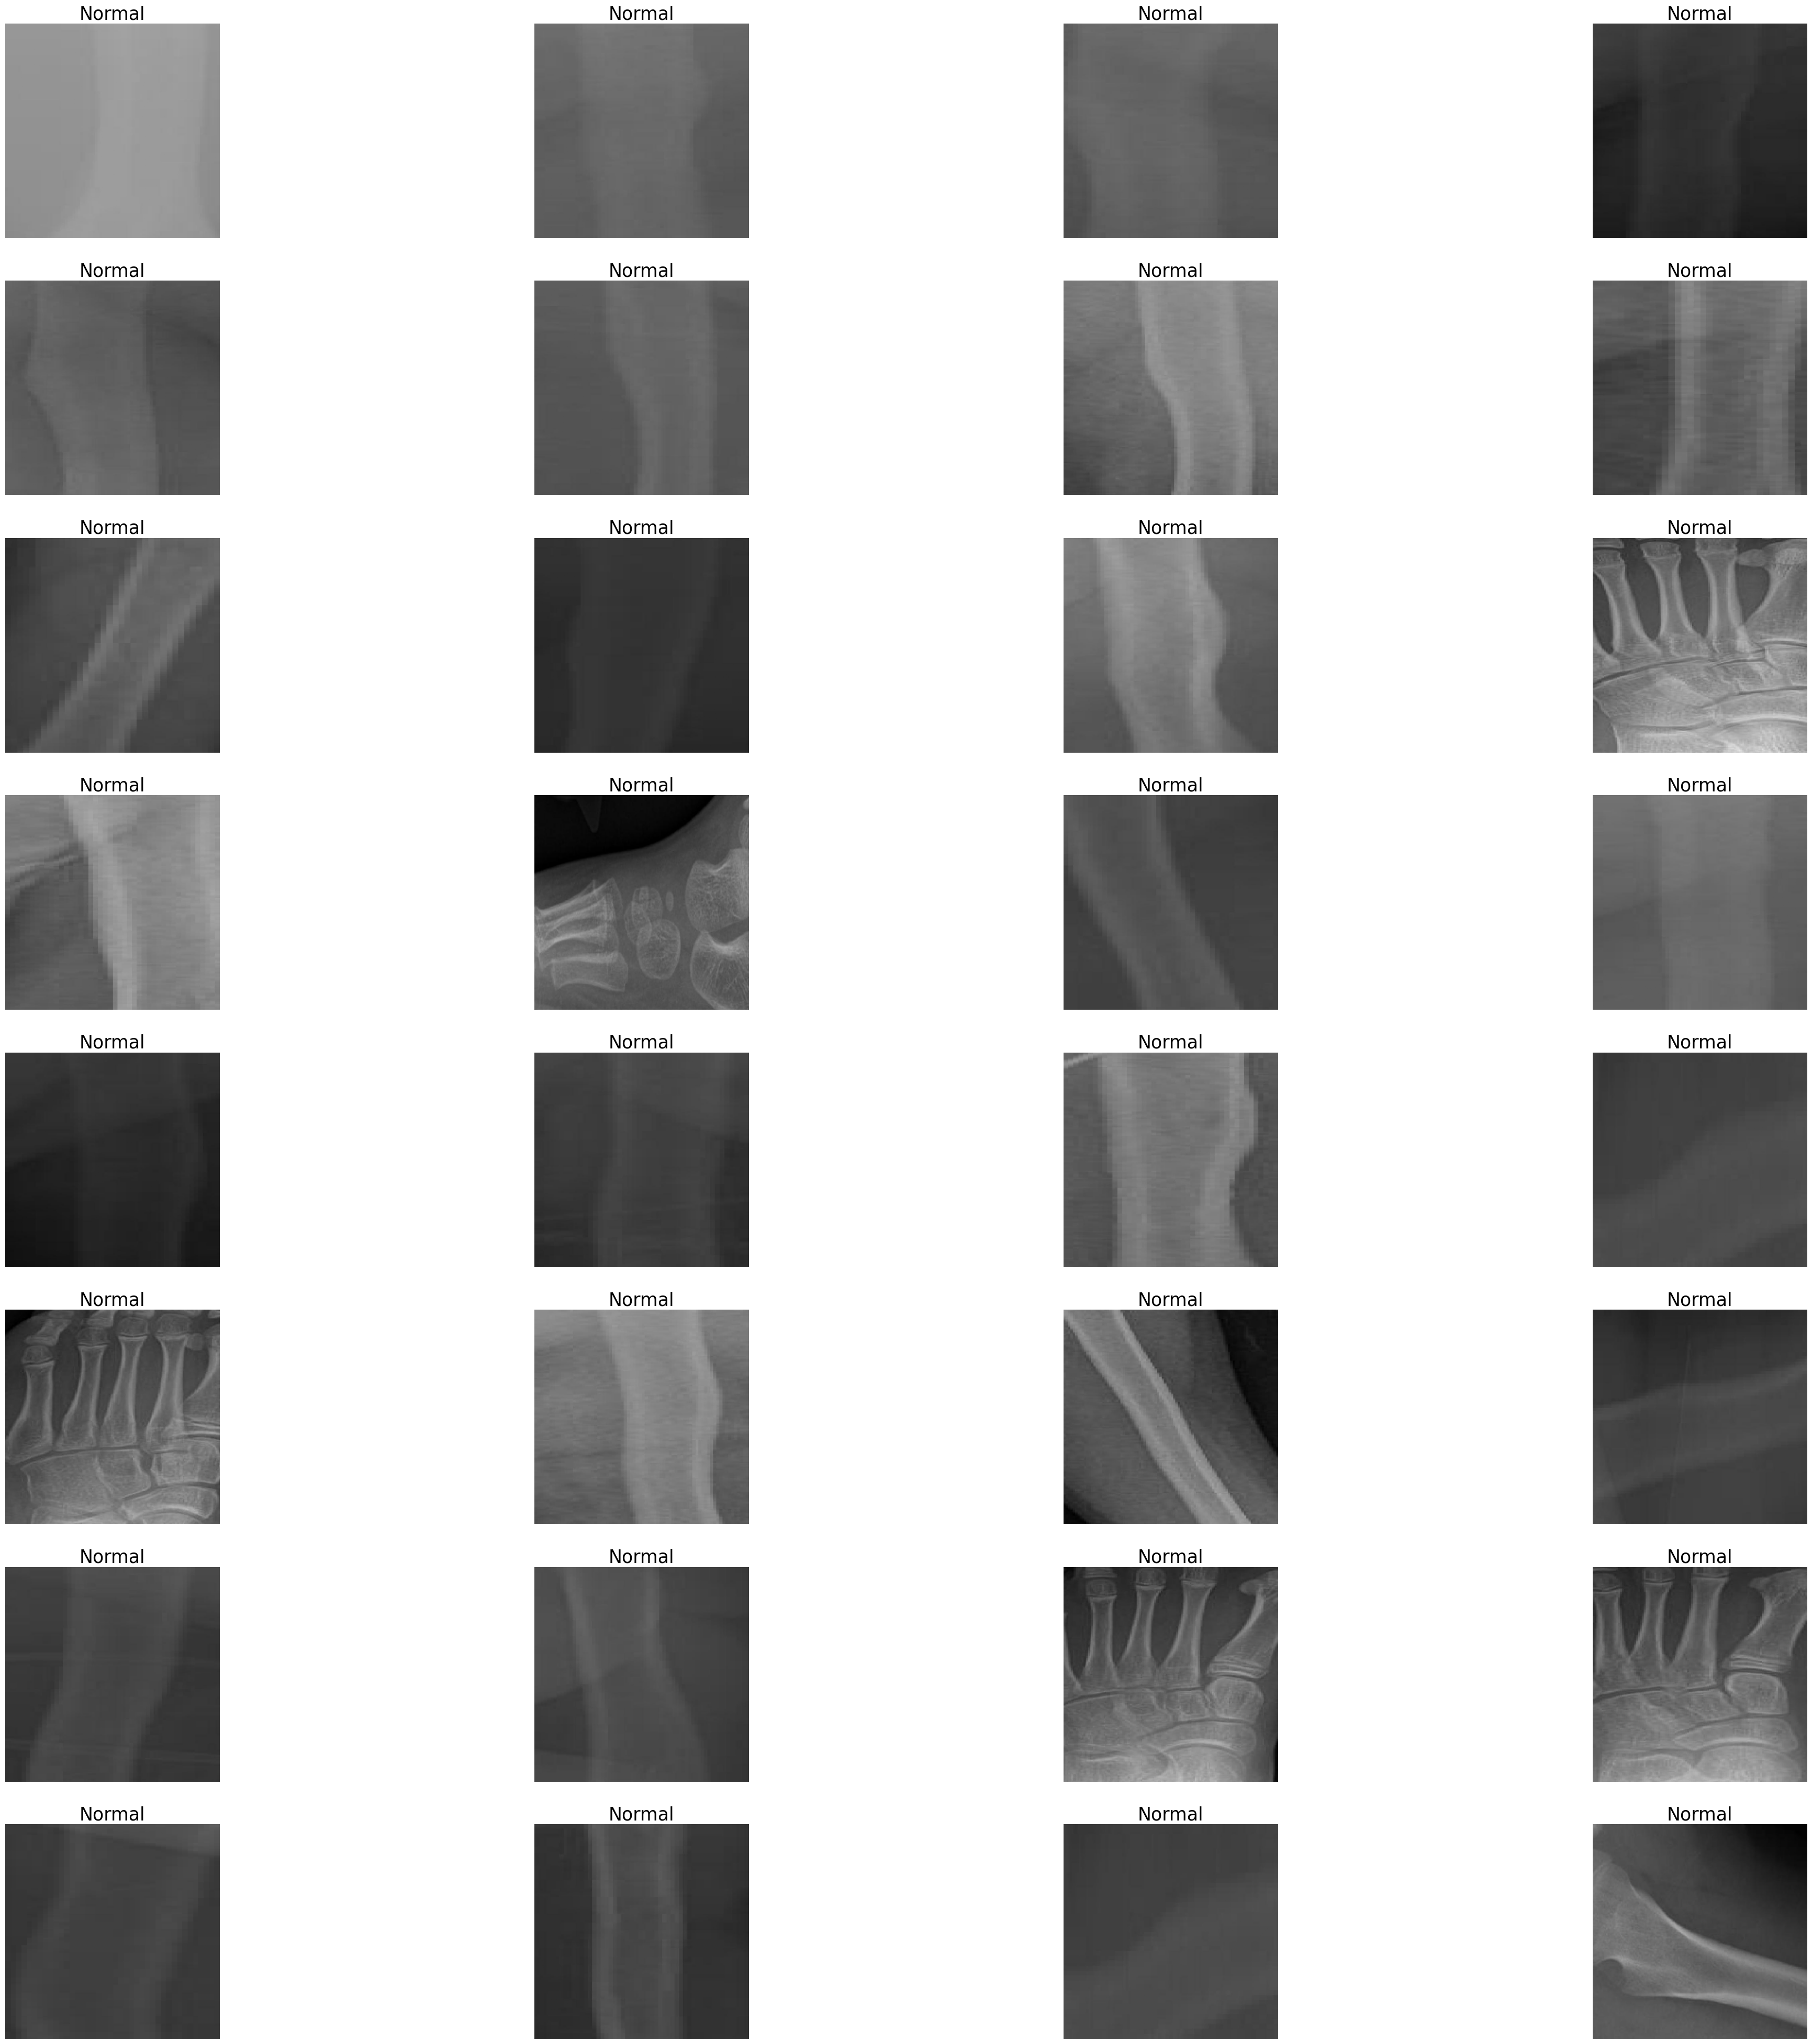

In [ ]:
class_names=['Cancer', 'Normal']
batch = next(test_generator)
images= batch[0]
plt.figure(figsize=(50,50))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(class_names[int(y_test[n])],fontsize=25)

In [ ]:
# Import the necessary library and function
from sklearn.metrics import classification_report


In [ ]:
# Classification Report
ClassificationReport = classification_report(y_test, y_pred, target_names=['Cancer','Normal'])
print('Classification Report:\n', ClassificationReport)

Classification Report:
               precision    recall  f1-score   support

      Cancer       0.87      0.80      0.83      1264
      Normal       0.83      0.89      0.85      1379

    accuracy                           0.84      2643
   macro avg       0.85      0.84      0.84      2643
weighted avg       0.84      0.84      0.84      2643



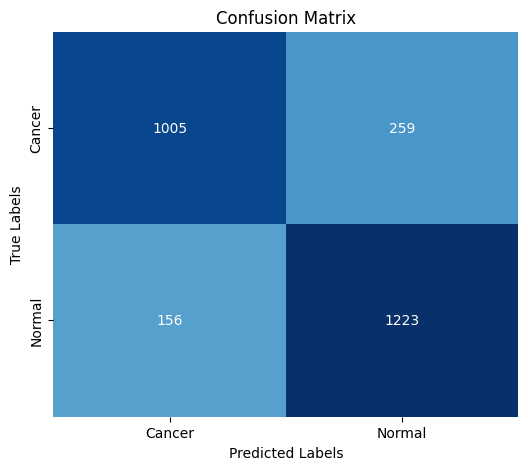

Confusion Matrix:
 [[1005  259]
 [ 156 1223]]


In [ ]:
from sklearn.metrics import confusion_matrix # import the confusion_matrix function
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(CM, fmt='g', center=True, cbar=False, annot=True, cmap='Blues',
            xticklabels=['Cancer', 'Normal'],
            yticklabels=['Cancer', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print('Confusion Matrix:\n', CM)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

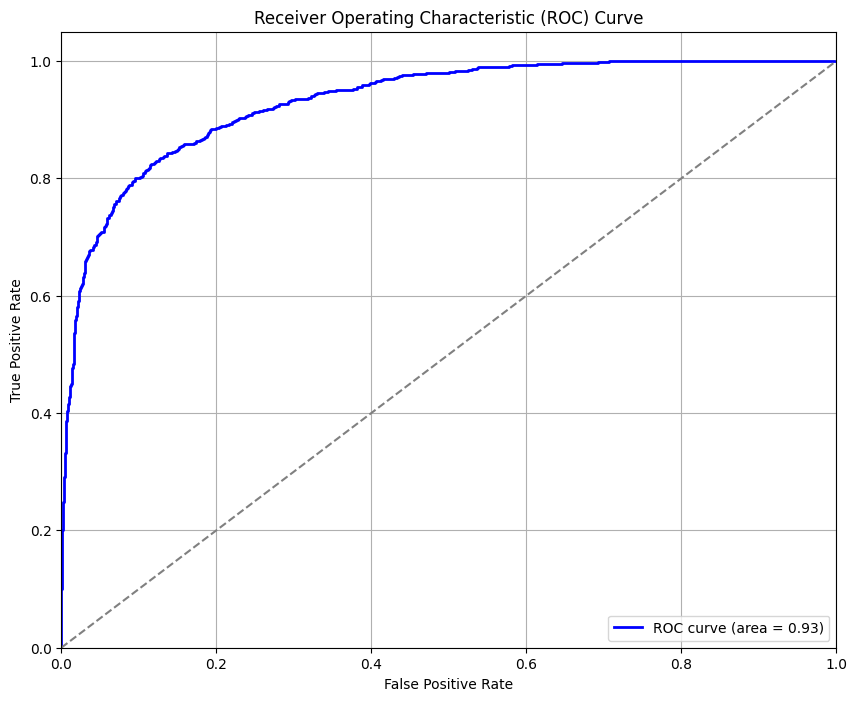

ROC AUC Score: 0.93


In [ ]:
# Import the necessary library and function
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels (if not already)
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()

#Calculate fpr, tpr, and roc_auc
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
print(f'ROC AUC Score: {roc_auc:.2f}')